## Programming for Data Analysis Project Notebook 2020 - Killian Foley
### Problem Statement
Manufacturing engineer performing a simulation on drilling of a hole in a workpiece to be tapped for an M8 x 1.25 thread screw in a future process. Rework is not acceptable so 1 iteration of drilling only. 
From reference "https://www.engineeringtoolbox.com/metric-threads-d_777.html" - we find tap size is 6.8mm with tolerance grade of IT7/H7 (https://www.engineersedge.com/international_tol.htm) so minimum hole diamter is 6.8mm and maximum hole diamter is 6.815 mm anything outside of.
Drill bit tolerance from manufacturers specification sheet - https://www.maford.com/SiteContent/Documents//2018_catalog_sections//MAFord_2018_Master_Catalog_HP_Drill_%20Selection_Chart.pdf - IT7/h7  6.8 +0/ -0.015mm. 

Drilling - Cutting process where the drill 

#### Variables Explained
Is the hole within tolerance = "accepted" (True or False)  
Drill bit starting diameter in mm = "drill_diameter" (mm)  
Number of cycles of drill bit = "cycles" (unit less number)  
Hole diameter = "hole_diameter" = (mm)

In [1]:
#start by importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set Numpy precision to 3 decimal places due to practical measurement accuracies
np.set_printoptions(precision=3)

#setting the random generator so results can be reproduced

from numpy.random import default_rng
rg = default_rng(135792468)

#Generating drill diameter data
drill_diameter = rg.uniform(6.8,6.815,100) #simulate drill diamaters using normal distribution
drill_diameter

array([6.809, 6.813, 6.805, 6.803, 6.81 , 6.808, 6.809, 6.803, 6.813,
       6.814, 6.808, 6.805, 6.803, 6.814, 6.8  , 6.809, 6.803, 6.813,
       6.808, 6.814, 6.811, 6.802, 6.815, 6.806, 6.805, 6.815, 6.802,
       6.812, 6.805, 6.804, 6.8  , 6.801, 6.813, 6.812, 6.812, 6.812,
       6.804, 6.814, 6.814, 6.808, 6.808, 6.809, 6.807, 6.811, 6.808,
       6.813, 6.809, 6.803, 6.803, 6.813, 6.813, 6.804, 6.808, 6.809,
       6.806, 6.806, 6.8  , 6.814, 6.813, 6.813, 6.811, 6.812, 6.811,
       6.801, 6.815, 6.805, 6.807, 6.803, 6.815, 6.807, 6.808, 6.802,
       6.809, 6.809, 6.814, 6.811, 6.812, 6.801, 6.811, 6.806, 6.813,
       6.804, 6.801, 6.812, 6.807, 6.805, 6.804, 6.803, 6.811, 6.803,
       6.801, 6.811, 6.803, 6.813, 6.805, 6.804, 6.813, 6.808, 6.806,
       6.811])

As the manufacturing facilty employs Six Sigma techniques the manufacturing yield will be designed to these paramters that is the upper and lower limits will be +3 and -3 standard deviations respectively with the distribution centred around the halfway point.  
https://en.wikipedia.org/wiki/Six_Sigma

In [2]:
mu, sigma = 6.0075, 0.0025 # create variables mean and standard deviation
hole_diameter = rg.normal(mu, sigma, 1000) # simulate hole diameter variable using normal distribution
hole_diameter

array([6.002, 6.009, 6.008, 6.008, 6.006, 6.011, 6.005, 6.004, 6.007,
       6.008, 6.005, 6.004, 6.004, 6.011, 6.002, 6.007, 6.008, 6.007,
       6.011, 6.007, 6.01 , 6.008, 6.002, 6.007, 6.003, 6.009, 6.01 ,
       6.005, 6.009, 6.01 , 6.011, 6.009, 6.007, 6.009, 6.006, 6.005,
       6.006, 6.007, 6.01 , 6.011, 6.007, 6.004, 6.01 , 6.011, 6.006,
       6.009, 6.007, 6.008, 6.007, 6.011, 6.009, 6.007, 6.004, 6.008,
       6.006, 6.005, 6.008, 6.008, 6.009, 6.009, 6.007, 6.004, 6.004,
       6.01 , 6.006, 6.003, 6.004, 6.006, 6.002, 6.009, 6.007, 6.007,
       6.007, 6.004, 6.012, 6.004, 6.013, 6.006, 6.008, 6.009, 6.007,
       6.01 , 6.007, 6.013, 6.006, 6.008, 6.007, 6.008, 6.008, 6.007,
       6.006, 6.009, 6.013, 6.008, 6.009, 6.013, 6.007, 6.01 , 6.009,
       6.003, 6.008, 6.009, 6.01 , 6.012, 6.002, 6.006, 6.005, 6.007,
       6.006, 6.007, 6.013, 6.008, 6.008, 6.01 , 6.007, 6.007, 6.008,
       6.006, 6.01 , 6.006, 6.006, 6.007, 6.007, 6.006, 6.008, 6.008,
       6.009, 6.012,

Cycles - after consulting the manufacturer and observing similar processes already in production it is estimated that number of cycles will range from 15-30 likely depending on the starting diameter of the drill bit.  
reference: https://www.sandvik.coromant.com/en-us/knowledge/machining-formulas-definitions/pages/drilling.aspx

In [3]:
cycles = rg.integers(15,30,100)
cycles

array([27, 16, 27, 23, 28, 21, 23, 20, 22, 28, 15, 28, 24, 15, 28, 16, 27,
       16, 19, 23, 29, 25, 16, 24, 17, 17, 15, 21, 28, 28, 19, 18, 22, 19,
       15, 26, 23, 20, 19, 29, 24, 25, 26, 29, 25, 18, 15, 27, 24, 20, 15,
       26, 27, 26, 27, 20, 26, 19, 22, 15, 24, 20, 18, 15, 15, 20, 24, 18,
       17, 26, 17, 27, 27, 22, 15, 28, 15, 29, 25, 28, 17, 15, 21, 17, 20,
       15, 26, 22, 29, 28, 27, 17, 26, 19, 15, 17, 23, 18, 16, 21])

As we are implementing Six Sigma techniques we should expect 3.4 defects per million 

In [10]:
outcome = [True, False]
accepted = rg.choice(outcome, 1000, p=[0.999999966,3.4E-8])
accepted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

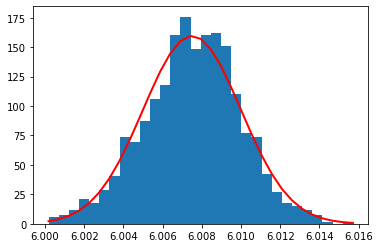

In [4]:
count, bins, ignored = plt.hist(hole_diameter, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()